In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.sample(6)

,Date,SPX,GLD,USO,SLV,EUR/USD
1827,4/6/2016,2066.659912,116.940002,9.600000,14.340000,1.140498
845,11/15/2011,1257.810059,173.360001,38.430000,33.660000,1.362416
1381,4/7/2014,1845.040039,124.910004,36.279999,19.129999,1.374306
549,7/12/2010,1078.750000,117.339996,33.779999,17.620001,1.272087
1250,9/17/2013,1704.760010,126.500000,37.740002,20.959999,1.335791
117,7/15/2008,1214.910034,96.169998,112.389999,18.700001,1.582203


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.duplicated().sum()

0

In [ ]:
correlation=gold_data.corr()

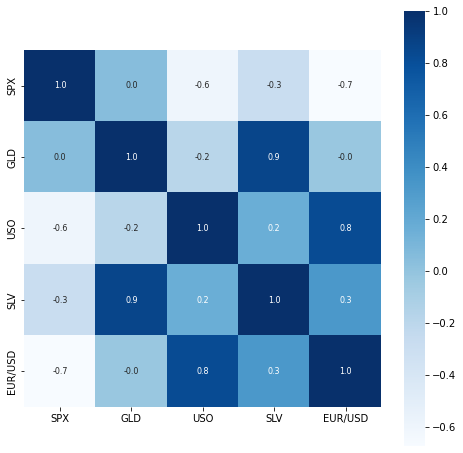

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


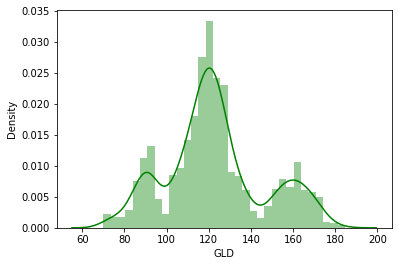

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
# Separating the input and output features
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
X,Y

(              SPX        USO      SLV   EUR/USD
 0     1447.160034  78.470001  15.1800  1.471692
 1     1447.160034  78.370003  15.2850  1.474491
 2     1411.630005  77.309998  15.1670  1.475492
 3     1416.180054  75.500000  15.0530  1.468299
 4     1390.189941  76.059998  15.5900  1.557099
 ...           ...        ...      ...       ...
 2285  2671.919922  14.060000  15.5100  1.186789
 2286  2697.790039  14.370000  15.5300  1.184722
 2287  2723.070068  14.410000  15.7400  1.191753
 2288  2730.129883  14.380000  15.5600  1.193118
 2289  2725.780029  14.405800  15.4542  1.182033
 
 [2290 rows x 4 columns], 0        84.860001
 1        85.570000
 2        85.129997
 3        84.769997
 4        86.779999
            ...    
 2285    124.589996
 2286    124.330002
 2287    125.180000
 2288    124.489998
 2289    122.543800
 Name: GLD, Length: 2290, dtype: float64)

# Splitting the training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
test_data_prediction

array([168.12909886,  81.96879978, 115.90820015, 127.72090082,
       120.671901  , 154.7293977 , 150.41129786, 126.12220013,
       117.46899885, 126.00120053, 116.6398009 , 172.37040066,
       141.37189854, 167.75949888, 115.17629993, 117.53490044,
       137.32700361, 169.62460102, 158.98650335, 158.07009953,
       155.1788003 , 125.19010035, 175.38800025, 157.34980287,
       125.28880045,  93.63999965,  76.85720011, 120.74650001,
       119.05789929, 167.43829937,  88.09590048, 125.25499993,
        91.06030055, 117.64350034, 121.10399948, 136.65220005,
       115.46580109, 115.01320057, 147.41739945, 107.39650088,
       104.27940244,  87.26139798, 126.55670038, 118.11389988,
       153.75879886, 119.58119994, 108.46869964, 108.09049846,
        93.3114009 , 127.10729771,  74.74590047, 113.67949939,
       121.22929996, 111.34199919, 118.79609885, 120.36759925,
       159.02690056, 168.06190123, 146.9245967 ,  86.18829865,
        94.2830999 ,  86.8235988 ,  90.52110002, 118.98

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890221471472518


# Compare the Actual and Predicted Values

In [ ]:
Y_test = list(Y_test)

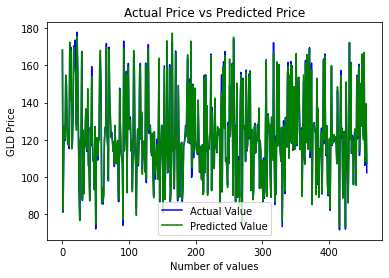

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
import pickle as pkl

In [ ]:
pkl.dump(regressor,open("gold_model.sav","wb"))